# Índice

1. [Introducción](#1.-Introducción)  
2. [Variables del CSV](#2.-Variables-del-CSV)  
3. [Librerias](#3.-Librerias)  
4. [Funciones](#4.-Funciones)  
5. [Lectura de los datos](#5.-Lectura-de-los-datos) 
6. [Split de los datos en Train y test](#6.-Split-de-los-datos-en-Train-y-test) 
7. [Modelo 1](#7.-Modelo-1)  
8. [Modelo 2](#8.-Modelo-2)  
9. [Modelo 3](#9.-Modelo-3)  

# 1. Introducción

Proyecto de Machine Learning en el que se busca entrenar un modelo capaz de predecir de la mejor forma posible la victoria del equipo azul en una partida de LoL (League of Legends). 

Para hacer esto, se van a utilizar dos conjuntos de datos extraidos de Kaggle, uno perteneciente a partidas hasta el minuto 10 y otro hasta el minuto 15 (las partidas duran entre 25-40 min).

Los resultados de ambas predicciones se van a comparar entre sí, para ver que modelo obtiene mejores resultados.

Los datos se han obtenido de:  
https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-rank-game10min15min

# 2. Variables del CSV

Ambos Dataset están formados inicialmente por 51 columnas (se añaden varias con la limpieza de las columnas categóricas), de las cuales 1 hace referencia al ID de la partida, para poder utilizarlo en la API de Riot Game (en caso de que se quisiera), y el resto (50) son los datos de la partida para cada equipo, teniendo 25 columnas duplicadas, unas para el equipo azul y las otras para el equipo rojo. Entre estas 25 están las que determinan la victoria para cada equipo, siendo el target duplicado.


La columna que no es de ningun equipo:
* **gameId**: ID de la partida. Se puede utilizar con la API de Riot Games  

Las columnas para el equipo azul son:
* **blueWins**: Columna Target. 1 si gana el equipo azul, 0 si gana el rojo 
* **blueTotalGolds**: Oro total conseguido por el equipo azul  
* **blueCurrentGolds**: Oro conseguido por el equipo azul en ese minuto de la partida 
* **blueTotalLevel**: Suma del nivel de todos los campeones del equipo azul en ese minuto de la partida 
* **blueAvgLevel**: Nivel medio de los campeones del equipo azul  
* **blueTotalMinionKills**: Total de súbditos (minions) eliminados por el equipo azul  
* **blueTotalJungleMinionKills**: Total de monstruos de la jungla eliminados por el equipo azul  
* **blueFirstBlood**: Primera muerte de la partida. 1 si el equipo azul realizó la primera muerte, 0 en caso contrario.  
* **blueKill**: Número de enemigos abatidos por el equipo azul  
* **blueDeath**: Número de veces que han muerto los jugadores del equipo azul  
* **blueAssist**: Número de "asistencias" en los enemigos abatidos por el equipo azul  
* **blueWardPlaced**: Número de tótems de protección (visión) colocados por el equipo azul en el mapa  
* **blueWardKills**: Número de tótems de protección (visión) colocados por el equipo rojo que el equipo azul ha destruido  
* **blueFirstTower**: Primera torre destruida de la partida. 1 si el equipo azul la destruyó, 0 en caso contrario.   
* **blueFirstInhibitor**: Primer Inhibidor destruido de la partida. 1 si el equipo azul la destruyó, 0 en caso contrario.  
* **blueFirstTowerLane**: Línea a la que pertenece la primera torre destruida de la partida. Columna categórica que hay que transformar.   
* **blueTowerKills**: Número de torres destruidas por el equipo azul.
* **blueMidTowerKills**: Número de torres de la "mid lane" (calle central) destruidas por el equipo azul.
* **blueTopTowerKills**: Número de torres de la "top lane" (calle superior) destruidas por el equipo azul.
* **blueBotTowerKills**: Número de torres de la "bot lane" (calle inferior) destruidas por el equipo azul.
* **blueInhibitor**: Número de inhibidores destruidos por el equipo azul.
* **blueFirstDragon**: Primer dragón eliminado de la partida. 1 si el equipo azul lo eliminó, 0 en caso contrario.   
* **blueDragnoType**: Tipo de dragón o dragones eliminados de la partida por el equipo azul. Columna categórica que hay que transformar.  
* **blueDragon**: Número de dragones abatidos por el equipo azul
* **blueRiftHeralds**: Número de heraldos abatidos por el equipo azul

Las otras 25 columnas son iguales, pero referidas al equipo rojo.

# 3. Librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# 4. Funciones

Se importa un archivo que contiene las funciones y las clases que se van a utilizar

In [2]:
from funciones import * #Esto lee todas las funciones del archivo funciones

# 5. Lectura de los datos

# 5.1. Carga de datos

In [3]:
#Se importan los datos
datos_15min = pd.read_csv('../data/raw_data/Challenger_Ranked_Games_15minute.csv')
datos_15min

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,24081,1190,44,8.8,309,74,0,8,...,['MID_LANE'],2,1,0,1,0,1,"['WATER_DRAGON', 'EARTH_DRAGON']",2,1
1,4247155821,1,24162,2212,46,9.2,393,64,0,5,...,['TOP_LANE'],1,0,1,0,0,0,[],0,0
2,4243963257,0,22413,1563,41,8.2,300,62,0,5,...,['BOT_LANE'],4,2,1,1,0,1,"['FIRE_DRAGON', 'EARTH_DRAGON']",2,1
3,4241678498,0,23837,3197,46,9.2,370,96,0,6,...,['TOP_LANE'],1,0,1,0,0,0,[],0,1
4,4241538868,1,27688,3663,44,8.8,381,66,0,9,...,['BOT_LANE'],2,1,0,1,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26829,4143231833,0,26110,1535,46,9.2,289,73,0,15,...,['BOT_LANE'],1,0,0,1,0,1,['WATER_DRAGON'],1,1
26830,4157911901,0,57503,3293,62,12.4,329,28,0,27,...,[],6,2,1,3,1,0,[],0,0
26831,3764171638,0,26091,2986,47,9.4,338,86,0,7,...,[],0,0,0,0,0,0,[],0,0
26832,4110201724,1,24734,4289,45,9.0,328,64,0,11,...,['BOT_LANE'],1,0,0,1,0,0,['AIR_DRAGON'],1,0


In [4]:
datos_10min = pd.read_csv('../data/raw_data/Challenger_Ranked_Games_10minute.csv')
datos_10min

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,14870,2889,32,6.4,199,53,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,4247155821,1,14497,2617,33,6.6,229,44,0,2,...,[],0,0,0,0,0,0,[],0,0
2,4243963257,0,15617,1757,34,6.8,223,39,0,3,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,4241678498,0,15684,1439,35,7.0,251,64,0,3,...,[],0,0,0,0,0,0,[],0,0
4,4241538868,1,17472,3512,35,7.0,257,46,0,7,...,[],0,0,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,4143231833,0,16762,5072,36,7.2,206,52,0,7,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26405,4157911901,0,35765,1440,39,7.8,191,16,0,18,...,[],3,1,0,2,0,0,[],0,0
26406,3764171638,0,15712,4137,34,6.8,218,55,0,3,...,[],0,0,0,0,0,0,[],0,0
26407,4110201724,1,15850,3220,33,6.6,193,48,0,6,...,[],0,0,0,0,0,0,[],0,0


# 5.2. Preparación de los datos

Hay que analizar los datos, porque los datos contienen columnas categóricas que habrá que trabajar

In [5]:
data_report(datos_15min).T

COL_N,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
Data Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,...,object,int64,int64,int64,int64,int64,int64,object,int64,int64
Missings (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unique Values,26779,2,12929,6332,76,76,440,155,1,78,...,4,12,6,5,5,4,2,48,5,3
CARDIN (%),99.80,0.01,48.18,23.60,0.28,0.28,1.64,0.58,0.00,0.29,...,0.01,0.04,0.02,0.02,0.02,0.01,0.01,0.18,0.02,0.01
Min. Value,3482432973,0,3627,-4756,5,1.00,0,0,0,0,...,['BOT_LANE'],0,0,0,0,0,0,"['AIR_DRAGON', 'AIR_DRAGON']",0,0
Max. Value,4261025558,1,80503,16905,80,16.00,463,210,0,92,...,[],11,5,4,4,3,1,[],4,2
Mean Value,4171923569.95,0.50,28498.26,3478.69,47.73,9.55,331.19,71.56,0.00,13.18,...,0.41,0.44,0.06,0.50,0.79,0.33,NaN,NaN,NaN,NaN


In [6]:
data_report(datos_10min).T

COL_N,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
Data Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,...,object,int64,int64,int64,int64,int64,int64,object,int64,int64
Missings (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unique Values,26354,2,8789,5649,48,48,238,107,1,56,...,4,9,6,4,5,2,2,19,4,2
CARDIN (%),99.79,0.01,33.28,21.39,0.18,0.18,0.90,0.41,0.00,0.21,...,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.07,0.02,0.01
Min. Value,3482432973,0,7792,38,8,1.60,1,0,0,0,...,['BOT_LANE'],0,0,0,0,0,0,"['AIR_DRAGON', 'EARTH_DRAGON']",0,0
Max. Value,4261025558,1,53161,16248,62,12.40,296,144,0,61,...,[],8,5,3,4,1,1,[],3,1
Mean Value,4171693429.65,0.50,18189.55,3134.71,36.26,7.25,213.85,46.31,0.00,7.66,...,0.04,0.04,0.01,0.37,0.37,0.14,NaN,NaN,NaN,NaN


Ambos conjuntos tienen columnas categóricas (FirstTowerLane y DragnoType). Estas columnas tienen dato vacío, en caso de que no se haya conseguido eliminar ni un dragón ni una torre.

Esto hay que tenerlo en cuenta a la hora de crear una codificación.

In [7]:
datos_10min.blueDragnoType.unique() #Para el equipo rojo es lo mismo

array(['[]', "['WATER_DRAGON']", "['FIRE_DRAGON']", "['EARTH_DRAGON']",
       "['AIR_DRAGON']", "['WATER_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']", "['WATER_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON']", "['ELDER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']",
       "['EARTH_DRAGON', 'WATER_DRAGON']"], dtype=object)

In [8]:
datos_10min.blueFirstTowerLane.unique() #Para el equipo rojo es lo mismo

array(['[]', "['BOT_LANE']", "['TOP_LANE']", "['MID_LANE']"], dtype=object)

En base al tipo de datos que aparecen, se pueden crear columnas nuevas con un One Hot Encoding con la función `get_dummies` o hacerlo manualmente para el tipo de dragon

Se utiliza una función definida en el apartado 4.

In [9]:
datos_10min = categorical_columns_proyect_LoL(datos_10min)
datos_15min = categorical_columns_proyect_LoL(datos_15min)

In [10]:
data_report(datos_15min).T

COL_N,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane_Mid_lane,redFirstTowerLane_Top_lane,blueDragonType_Air,blueDragonType_Water,blueDragonType_Fire,blueDragonType_Earth,redDragonType_Air,redDragonType_Water,redDragonType_Fire,redDragonType_Earth
Data Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,...,uint8,uint8,int32,int32,int32,int32,int32,int32,int32,int32
Missings (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unique Values,26779,2,12929,6332,76,76,440,155,1,78,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),99.80,0.01,48.18,23.60,0.28,0.28,1.64,0.58,0.00,0.29,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Min. Value,3482432973.00,0.00,3627.00,-4756.00,5.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Max. Value,4261025558.00,1.00,80503.00,16905.00,80.00,16.00,463.00,210.00,0.00,92.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Mean Value,4171923569.95,0.50,28498.26,3478.69,47.73,9.55,331.19,71.56,0.00,13.18,...,0.12,0.18,0.16,0.16,0.17,0.16,0.20,0.20,0.19,0.20


In [11]:
data_report(datos_10min).T

COL_N,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane_Mid_lane,redFirstTowerLane_Top_lane,blueDragonType_Air,blueDragonType_Water,blueDragonType_Fire,blueDragonType_Earth,redDragonType_Air,redDragonType_Water,redDragonType_Fire,redDragonType_Earth
Data Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,...,uint8,uint8,int32,int32,int32,int32,int32,int32,int32,int32
Missings (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Unique Values,26354,2,8789,5649,48,48,238,107,1,56,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),99.79,0.01,33.28,21.39,0.18,0.18,0.90,0.41,0.00,0.21,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Min. Value,3482432973.00,0.00,7792.00,38.00,8.00,1.60,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Max. Value,4261025558.00,1.00,53161.00,16248.00,62.00,12.40,296.00,144.00,0.00,61.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Mean Value,4171693429.65,0.50,18189.55,3134.71,36.26,7.25,213.85,46.31,0.00,7.66,...,0.04,0.03,0.07,0.08,0.09,0.07,0.09,0.10,0.10,0.09


Como la columna tardet se encuentra duplicada (aparece la victoria para el equipo azul y la del equipo rojo) hay que eliminar la del equipo rojo antes de comenzar la división para no tener problemas a la hora de predecir.

In [12]:
datos_10min = datos_10min.copy().drop(['redWins'], axis=1)
datos_15min = datos_15min.copy().drop(['redWins'], axis=1)

In [13]:
df1 = datos_10min.iloc[:,:20] # Select First 15 Columns
df2 = datos_10min.iloc[:,21:40] 
df3 = datos_10min.iloc[:,41:61] 

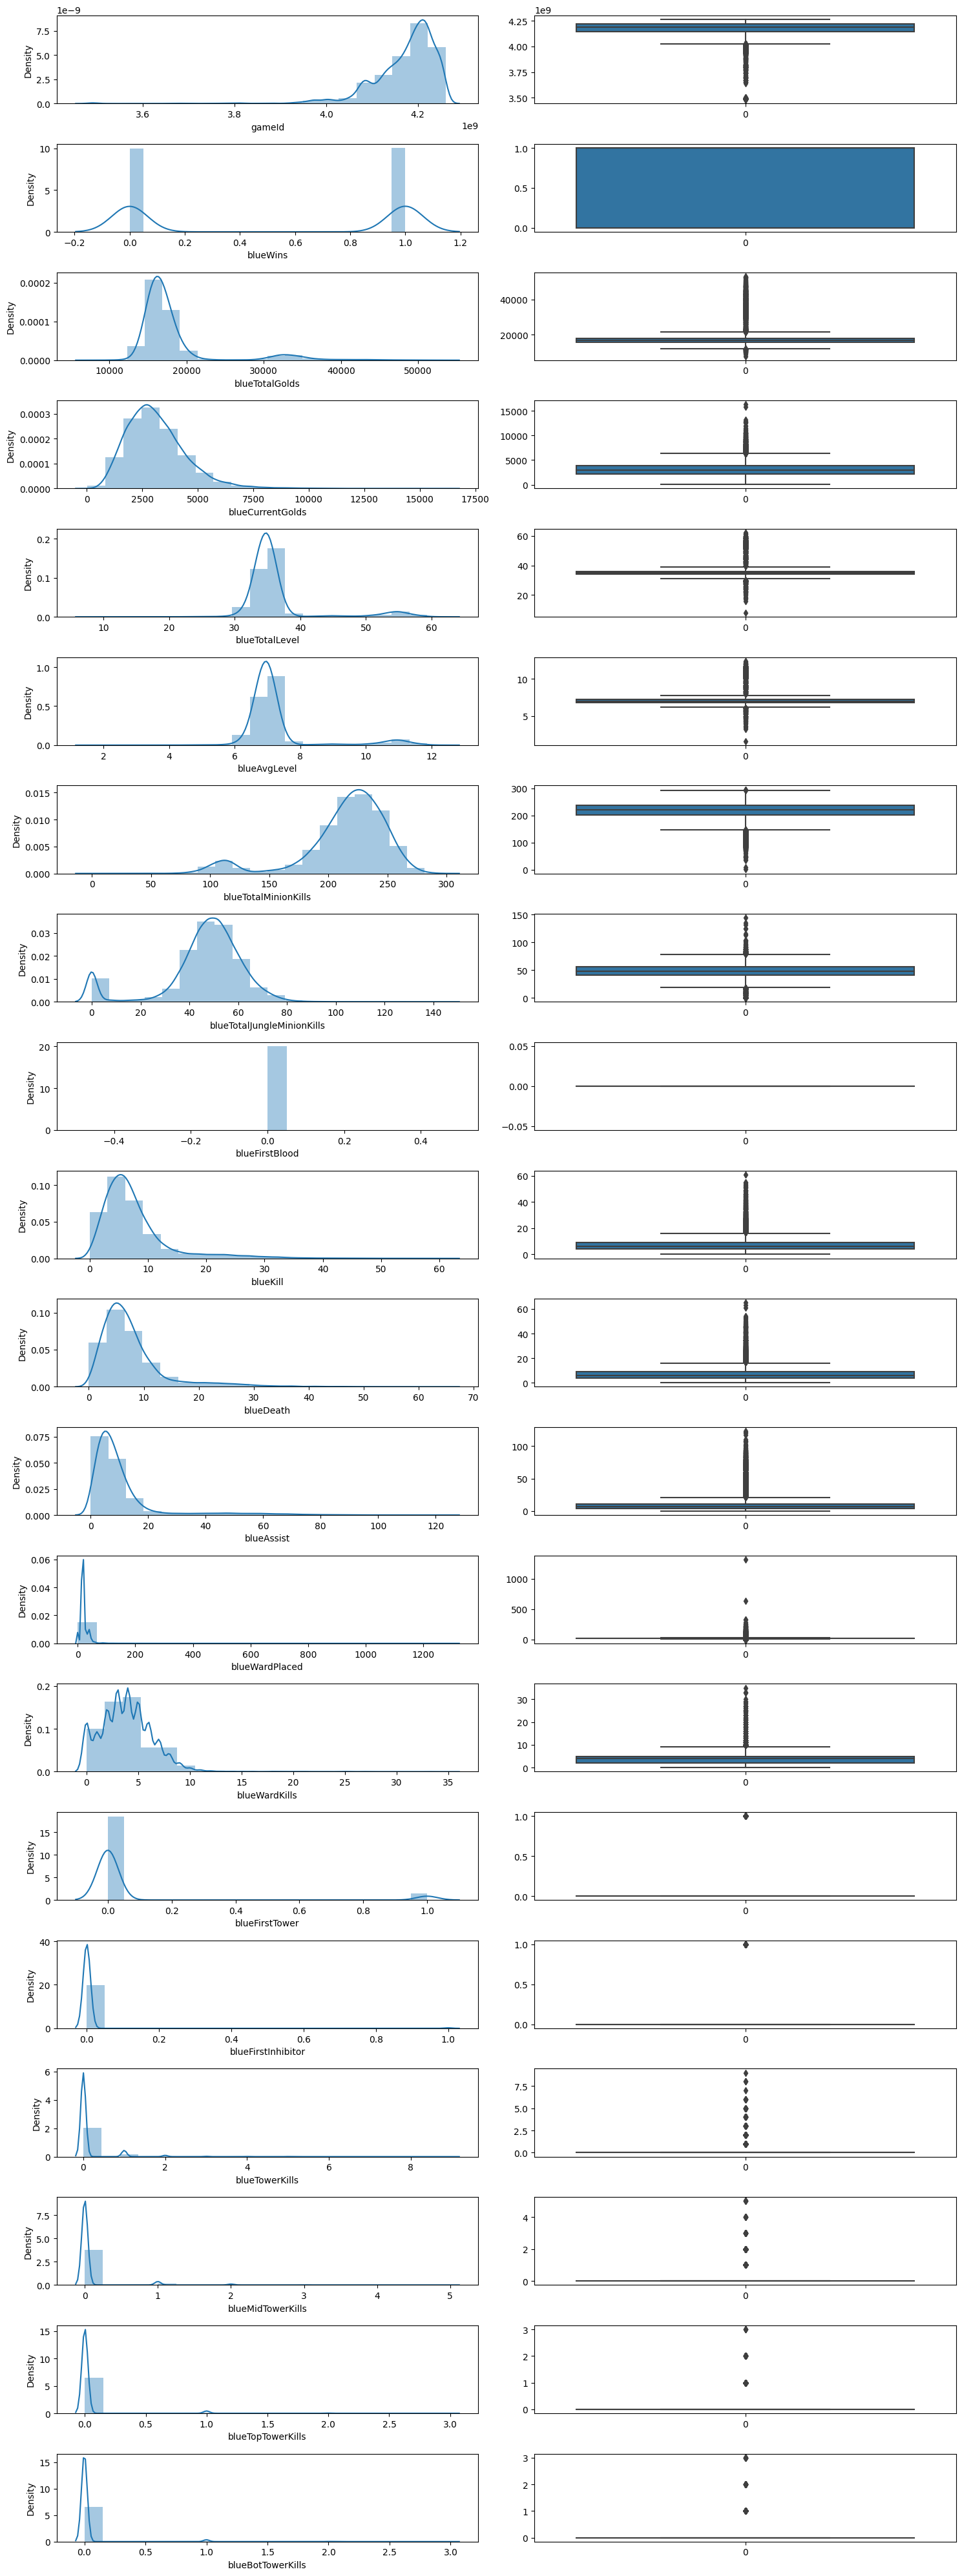

In [14]:
plot_distributions(df1)

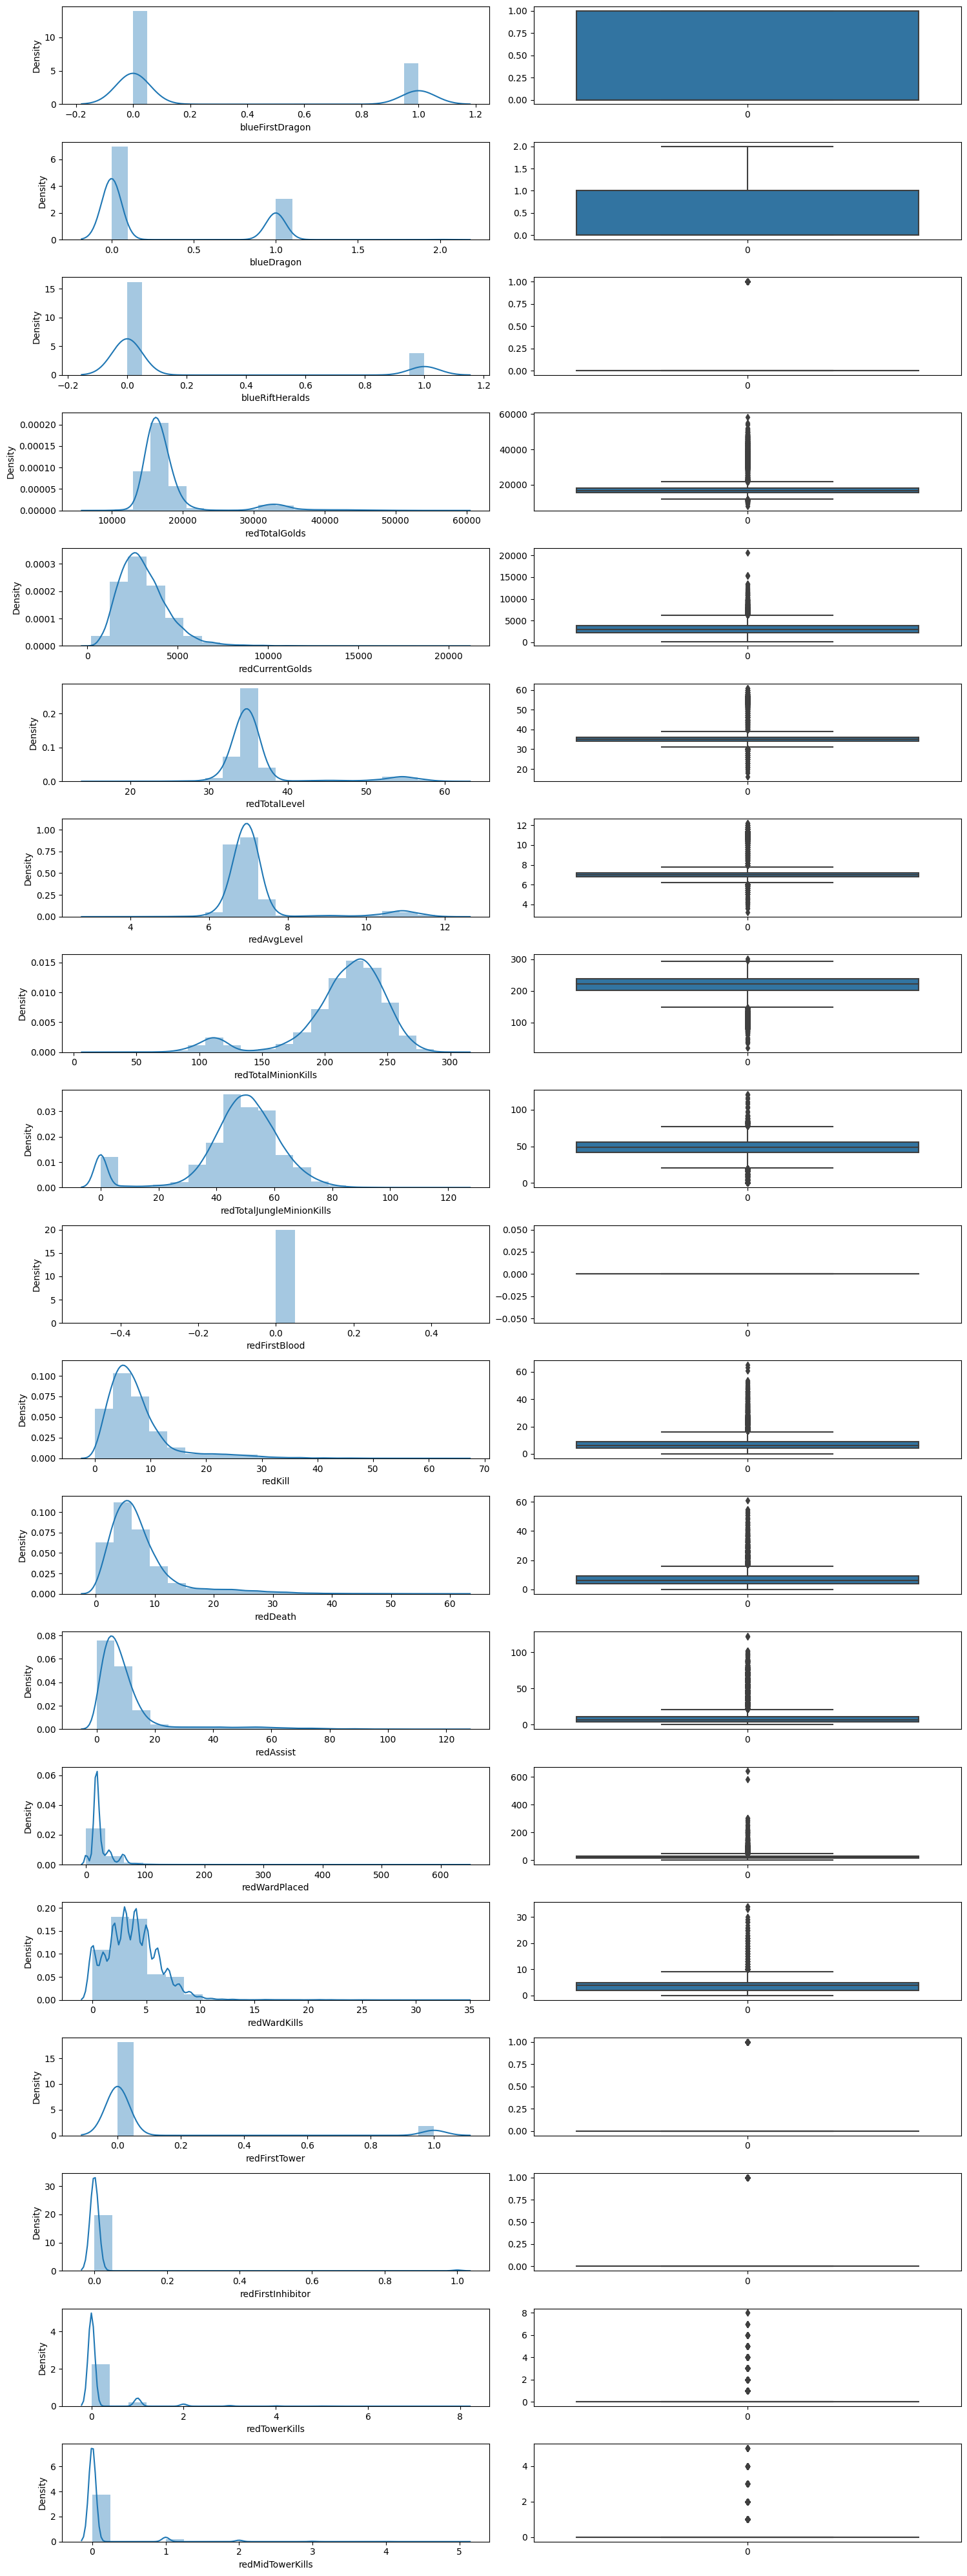

In [15]:
plot_distributions(df2)

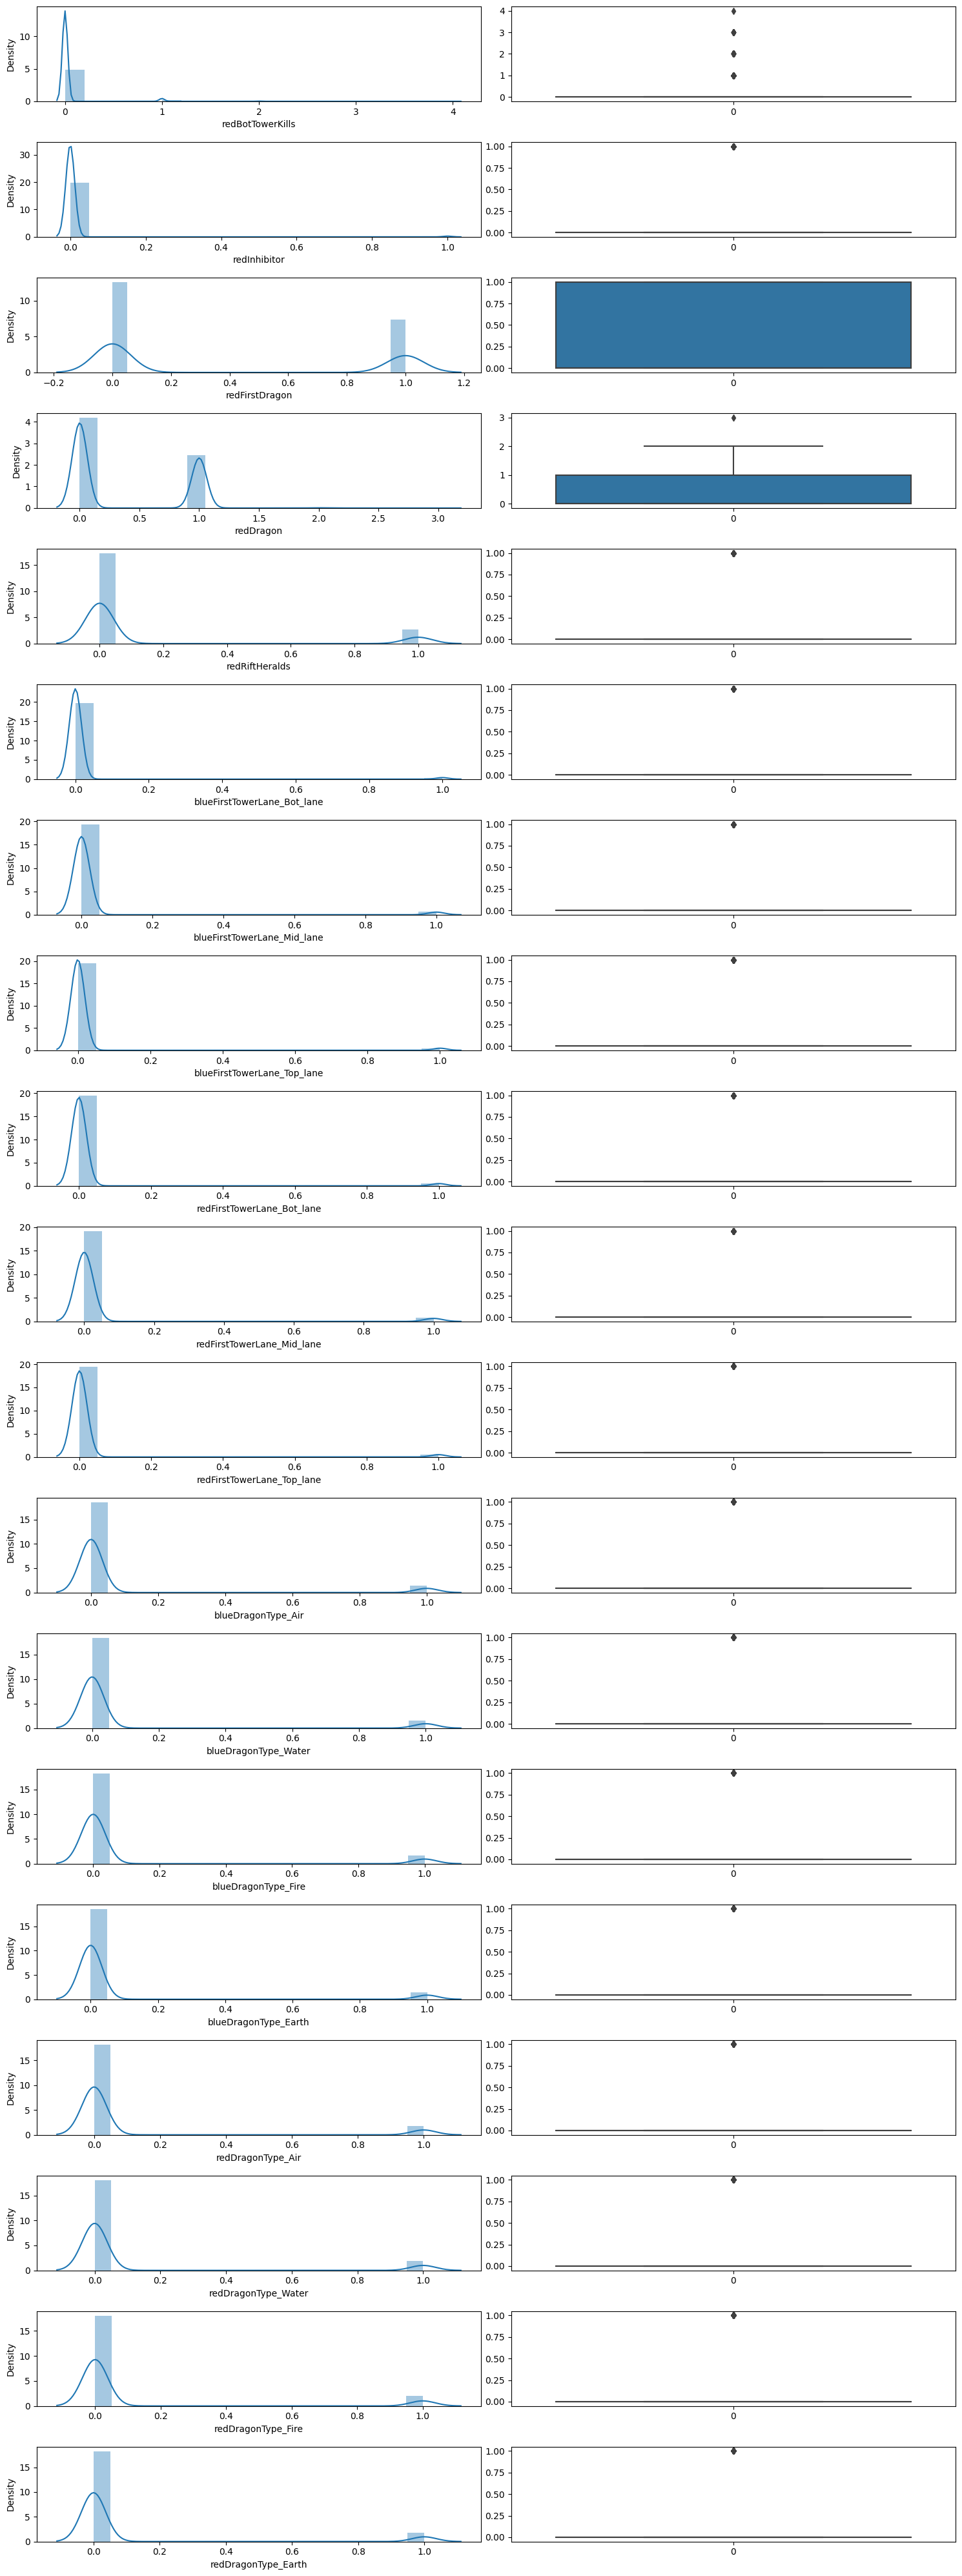

In [16]:
plot_distributions(df3)

# 5.3. Primera división de los datos
Una vez se tienen los datos preparados, se puede hacer una primera división.

Como la cantidad de datos es grande, de los datos de partida se pueden crear 2 grupos, uno de "trabajo" que se dividirá luego en train y test y otro grupo que sea para validación final.

La distribución de los datos sería 60% train, 20% test y 20% validación.

Para hacer esta separación de los datos de validación se utiliza la función `train_test_split()`

In [17]:
datos_entrenamiento_15min, datos_validacion_15min= train_test_split(datos_15min, test_size = 0.20, random_state=42)
print("-------Partidas 15 min---------")
print("-------------------------------")
print("Datos en bruto:", len(datos_15min))
print("-------------------------------")
print("Datos de entrenamiento:", len(datos_entrenamiento_15min))
print("-------------------------------")
print("Datos de validación:", len(datos_validacion_15min))
print("-------------------------------")

datos_entrenamiento_10min, datos_validacion_10min= train_test_split(datos_10min, test_size = 0.20, random_state=42)
print("\n")
print("-------Partidas 10 min---------")
print("-------------------------------")
print("Datos en bruto:", len(datos_10min))
print("-------------------------------")
print("Datos de entrenamiento:", len(datos_entrenamiento_10min))
print("-------------------------------")
print("Datos de validación:", len(datos_validacion_10min))
print("-------------------------------")

-------Partidas 15 min---------
-------------------------------
Datos en bruto: 26834
-------------------------------
Datos de entrenamiento: 21467
-------------------------------
Datos de validación: 5367
-------------------------------


-------Partidas 10 min---------
-------------------------------
Datos en bruto: 26409
-------------------------------
Datos de entrenamiento: 21127
-------------------------------
Datos de validación: 5282
-------------------------------


Este mapa de correlación muestra aquellas columnas que tienen correlación de un valor de 0.3 o superior (en valor absoluto)

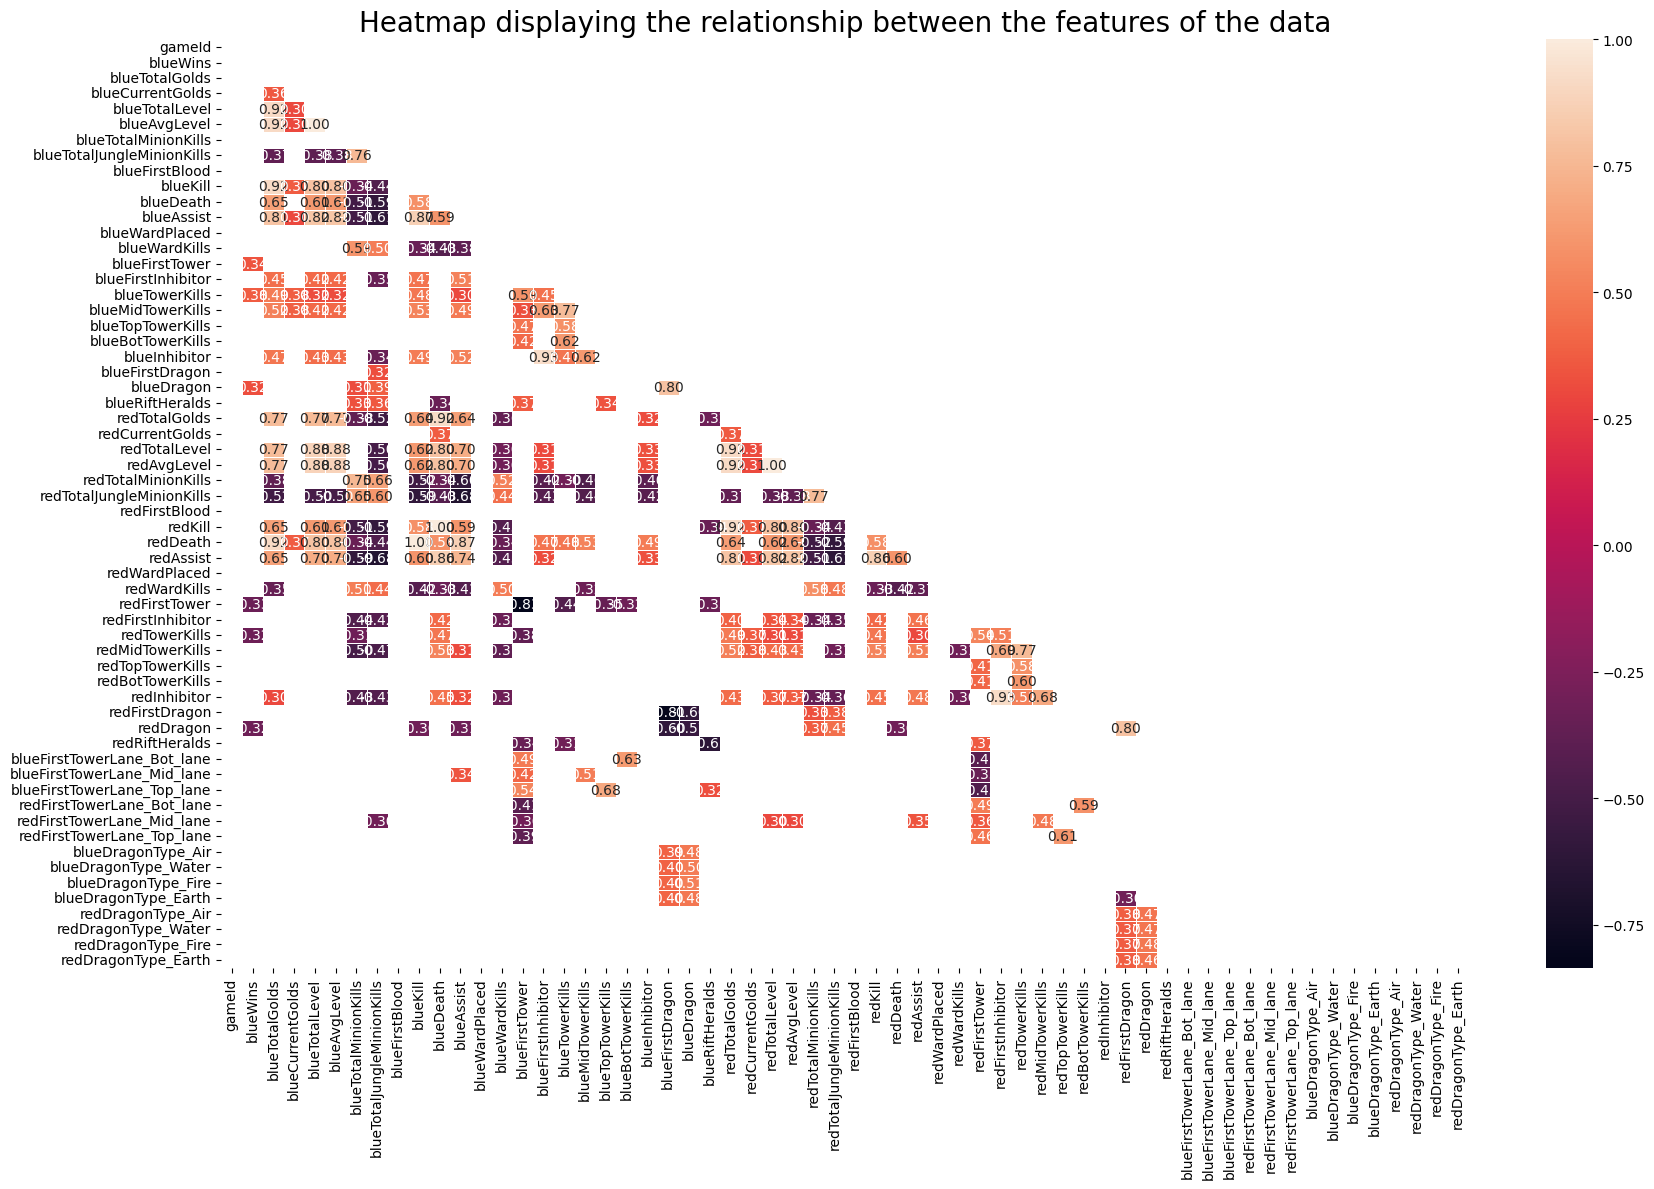

In [18]:
correlation_heatmap(datos_entrenamiento_15min)

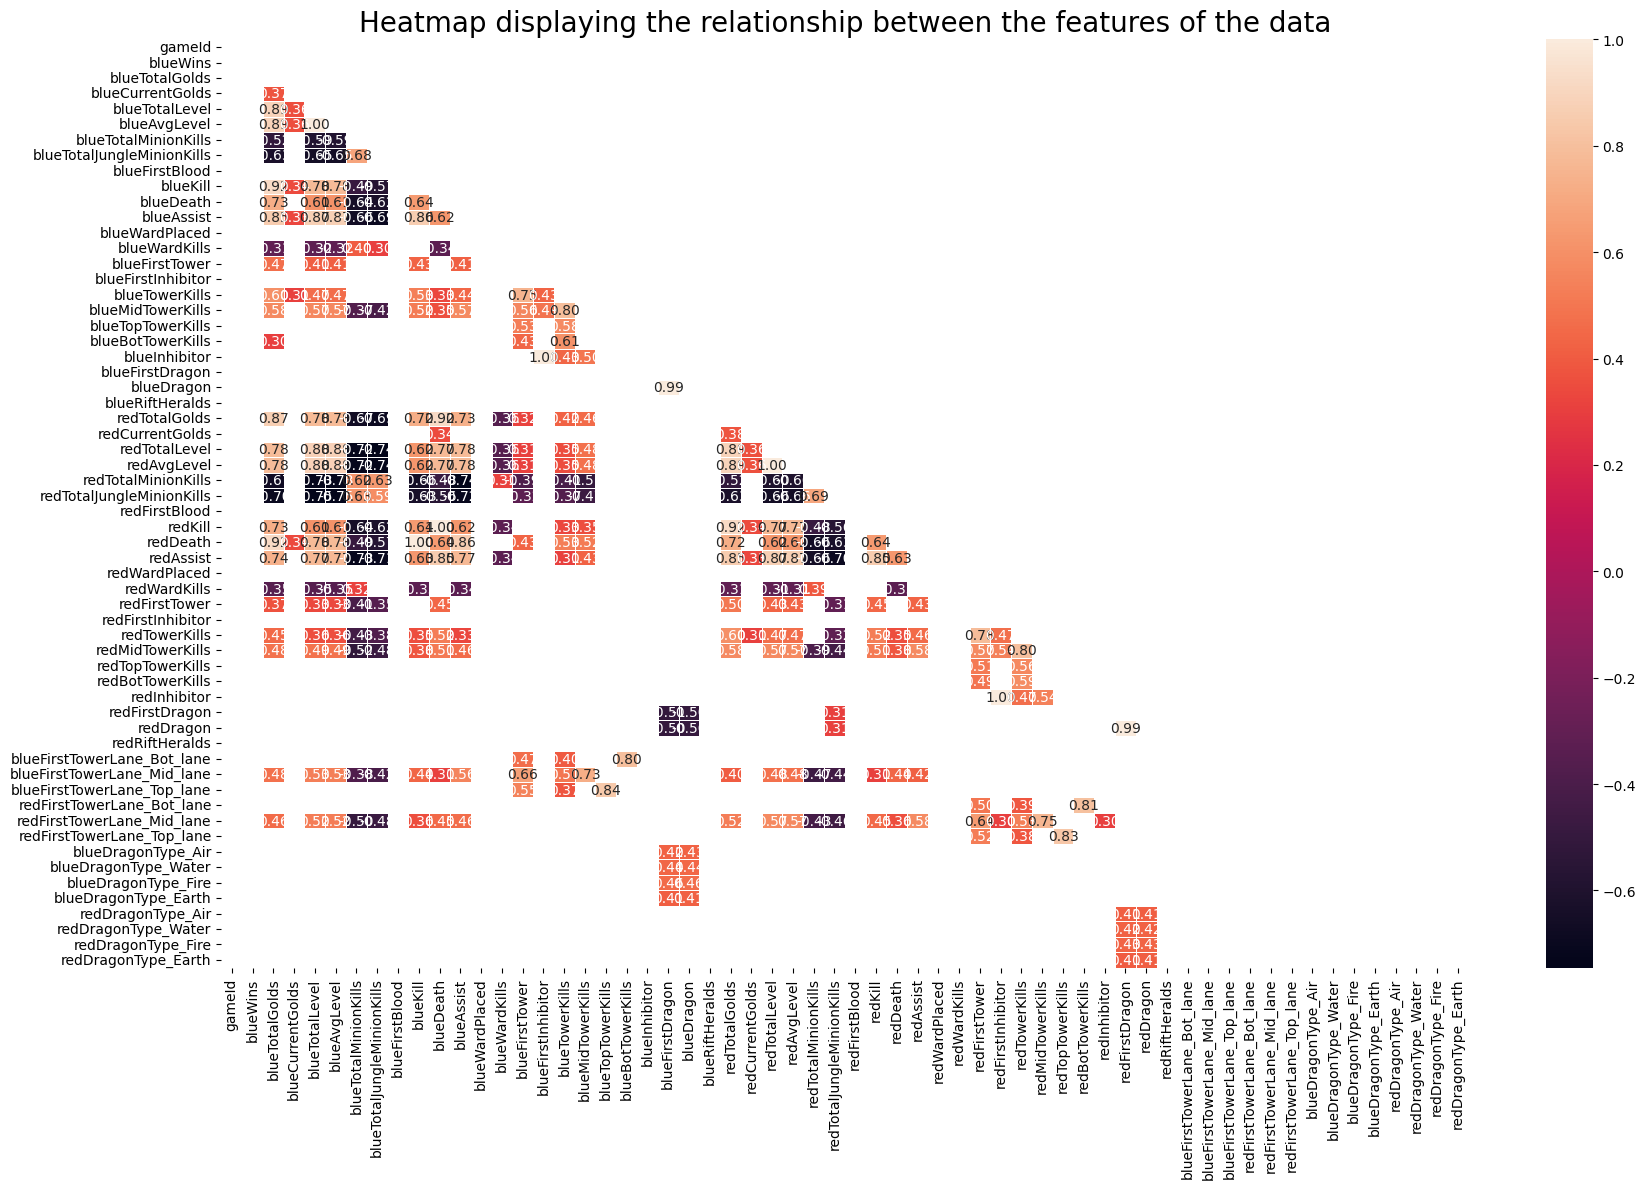

In [19]:
correlation_heatmap(datos_entrenamiento_10min)

Se comprueba si la variable target está bien balanceada

In [20]:
datos_entrenamiento_15min.blueWins.value_counts(normalize = True) #Está balanceada

0   0.50
1   0.50
Name: blueWins, dtype: float64

In [21]:
datos_entrenamiento_10min.blueWins.value_counts(normalize = True) #Está balanceada

1   0.50
0   0.50
Name: blueWins, dtype: float64

# 6. Split de los datos en Train y test

In [22]:
#Se hace una copia de los datos iniciales para aplicar este modelo
modelo_15min=datos_entrenamiento_15min.copy()

#Se crean la X y la y
X_15min = modelo_15min.copy().drop(['blueWins'], axis=1)
y_15min = modelo_15min[['blueWins']]

#Se realiza la división 
X_train_15min, X_test_15min, y_train_15min, y_test_15min = train_test_split(X_15min, y_15min, test_size=0.2, random_state=42)

In [23]:
#Se hace una copia de los datos iniciales para aplicar este modelo
modelo_10min=datos_entrenamiento_10min.copy()

#Se crean la X y la y
X_10min = modelo_10min.copy().drop(['blueWins'], axis=1)
y_10min = modelo_10min[['blueWins']]

#Se realiza la división 
X_train_10min, X_test_10min, y_train_10min, y_test_10min = train_test_split(X_10min, y_10min, test_size=0.2, random_state=42)

In [24]:
#Se preparan los datos de validación
validacion_15min=datos_validacion_15min.copy()

#Se crean la X y la y
X_val_15min = validacion_15min.copy().drop(['blueWins'], axis=1)
y_val_15min = validacion_15min[['blueWins']]

In [25]:
#Se preparan los datos de validación
validacion_10min=datos_validacion_10min.copy()

#Se crean la X y la y
X_val_10min = validacion_10min.copy().drop(['blueWins'], axis=1)
y_val_10min = validacion_10min[['blueWins']]

## MinMaxScaler

In [26]:
# Se almacenan en el objeto scaler todo lo necesario para estandarizar, con los datos de train de partidas de 15min
scaler = MinMaxScaler()
scaler.fit(X_train_15min)

# Se utilizan los datos de train para escalar train y test.
X_train_15min = scaler.transform(X_train_15min)
X_test_15min = scaler.transform(X_test_15min)

In [27]:
# Se almacenan en el objeto scaler todo lo necesario para estandarizar, con los datos de train de partidas de 10min
scaler = MinMaxScaler()
scaler.fit(X_train_10min)

# Se utilizan los datos de train para escalar train y test.
X_train_10min = scaler.transform(X_train_10min)
X_test_10min = scaler.transform(X_test_10min)

In [28]:
# Se almacenan en el objeto scaler todo lo necesario para estandarizar, con los datos de train de partidas de 15min
scaler = MinMaxScaler()
scaler.fit(X_val_15min)

# Se utilizan los datos de train para escalar train y test.
X_val_15min = scaler.transform(X_val_15min)

In [29]:
# Se almacenan en el objeto scaler todo lo necesario para estandarizar, con los datos de train de partidas de 10min
scaler = MinMaxScaler()
scaler.fit(X_val_10min)

# Se utilizan los datos de train para escalar train y test.
X_val_10min = scaler.transform(X_val_10min)

# 7. Modelo 1
Primera prueba con las redes

# 7.1. Arquitectura de la red neuronal

In [30]:
capas = [
    keras.layers.Flatten(),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
]
model = keras.models.Sequential(capas)

# 7.2. Inicializadores

In [31]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 7.3. Entrenamiento

### Partidas 15min

In [32]:
print("Fit model on training data")
history_15min = model.fit(
    X_train_15min,
    y_train_15min,
    epochs=15,
    validation_data=(X_test_15min, y_test_15min)
)

Fit model on training data
Epoch 1/15
537/537 [==============================] - 2s 2ms/step - loss: 0.6951 - accuracy: 0.6733 - val_loss: 0.5600 - val_accuracy: 0.7208
Epoch 2/15
537/537 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7292 - val_loss: 0.5239 - val_accuracy: 0.7394
Epoch 3/15
537/537 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.7508 - val_loss: 0.4950 - val_accuracy: 0.7641
Epoch 4/15
537/537 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.7691 - val_loss: 0.4743 - val_accuracy: 0.7781
Epoch 5/15
537/537 [==============================] - 1s 2ms/step - loss: 0.4630 - accuracy: 0.7797 - val_loss: 0.4688 - val_accuracy: 0.7760
Epoch 6/15
537/537 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.7868 - val_loss: 0.4562 - val_accuracy: 0.7839
Epoch 7/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4437 - accuracy: 0.7904 - val_loss: 0.4506 - 

In [33]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_15min,
    y_train_15min,
    epochs=15,
    validation_data=(X_test_15min, y_test_15min)
)

Epoch 1/15
537/537 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8025 - val_loss: 0.4308 - val_accuracy: 0.8018
Epoch 2/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.7978 - val_loss: 0.4294 - val_accuracy: 0.8030
Epoch 3/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4246 - accuracy: 0.8028 - val_loss: 0.4262 - val_accuracy: 0.8067
Epoch 4/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4252 - accuracy: 0.8004 - val_loss: 0.4536 - val_accuracy: 0.7809
Epoch 5/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8017 - val_loss: 0.4287 - val_accuracy: 0.8034
Epoch 6/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8021 - val_loss: 0.4246 - val_accuracy: 0.8067
Epoch 7/15
537/537 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8029 - val_loss: 0.4473 - val_accuracy: 0.7862
Epoch 

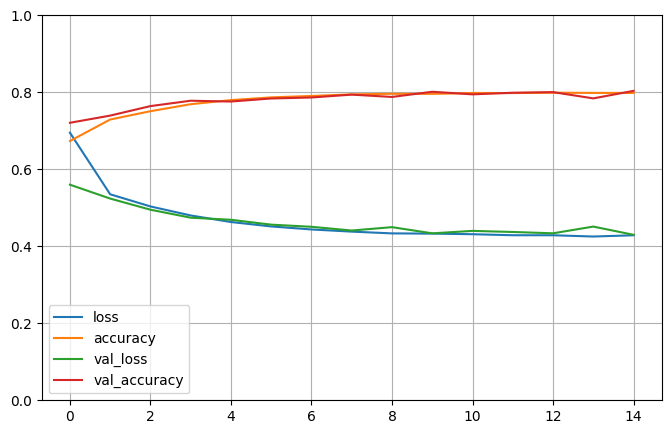

In [34]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Partidas 10min

In [35]:
print("Fit model on training data")
history_10min = model.fit(
    X_train_10min,
    y_train_10min,
    epochs=15,
    validation_data=(X_test_10min, y_test_10min)
)

Fit model on training data
Epoch 1/15
529/529 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7373 - val_loss: 0.5331 - val_accuracy: 0.7269
Epoch 2/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5234 - accuracy: 0.7382 - val_loss: 0.5213 - val_accuracy: 0.7378
Epoch 3/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5220 - accuracy: 0.7380 - val_loss: 0.5221 - val_accuracy: 0.7390
Epoch 4/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5204 - accuracy: 0.7392 - val_loss: 0.5510 - val_accuracy: 0.7149
Epoch 5/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5210 - accuracy: 0.7384 - val_loss: 0.5353 - val_accuracy: 0.7184
Epoch 6/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5194 - accuracy: 0.7405 - val_loss: 0.5184 - val_accuracy: 0.7390
Epoch 7/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5188 - accuracy: 0.7405 - val_loss: 0.5207 - 

In [36]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_10min,
    y_train_10min,
    epochs=15,
    validation_data=(X_test_10min, y_test_10min)
)

Epoch 1/15
529/529 [==============================] - 1s 2ms/step - loss: 0.5185 - accuracy: 0.7408 - val_loss: 0.5553 - val_accuracy: 0.7163
Epoch 2/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.7397 - val_loss: 0.5494 - val_accuracy: 0.7177
Epoch 3/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5169 - accuracy: 0.7412 - val_loss: 0.5329 - val_accuracy: 0.7234
Epoch 4/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.7410 - val_loss: 0.5169 - val_accuracy: 0.7395
Epoch 5/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5176 - accuracy: 0.7400 - val_loss: 0.5572 - val_accuracy: 0.7097
Epoch 6/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5166 - accuracy: 0.7442 - val_loss: 0.5458 - val_accuracy: 0.7137
Epoch 7/15
529/529 [==============================] - 1s 1ms/step - loss: 0.5164 - accuracy: 0.7408 - val_loss: 0.5487 - val_accuracy: 0.7191
Epoch 

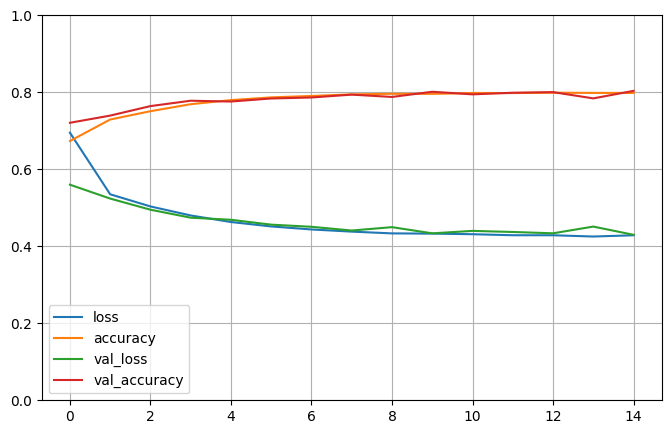

In [37]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 7.4. Desempeño contra validación

### Partidas 15min

In [38]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_15min, y_val_15min)
print("test loss, test acc:", results)

Evaluate on test data
168/168 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7790
test loss, test acc: [0.4465044140815735, 0.7790199518203735]


### Partidas 10min

In [39]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_10min, y_val_10min)
print("test loss, test acc:", results)

Evaluate on test data
166/166 [==============================] - 0s 1ms/step - loss: 0.5290 - accuracy: 0.7346
test loss, test acc: [0.5290090441703796, 0.7345702648162842]


# 8. Modelo 2

# 8.1. Arquitectura de la red neuronal

In [40]:
capas = [
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='softmax')
]
model = keras.models.Sequential(capas)

# 8.2. Inicializadores

In [41]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 8.3. Entrenamiento

### Partidas 15min

In [42]:
print("Fit model on training data")
history_15min = model.fit(
    X_train_15min,
    y_train_15min,
    epochs=20,
    validation_data=(X_test_15min, y_test_15min)
)

Fit model on training data
Epoch 1/20
537/537 [==============================] - 1s 2ms/step - loss: 0.8176 - accuracy: 0.6939 - val_loss: 0.5529 - val_accuracy: 0.7238
Epoch 2/20
537/537 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7410 - val_loss: 0.5160 - val_accuracy: 0.7508
Epoch 3/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4928 - accuracy: 0.7614 - val_loss: 0.4837 - val_accuracy: 0.7771
Epoch 4/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4710 - accuracy: 0.7777 - val_loss: 0.4661 - val_accuracy: 0.7864
Epoch 5/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.7805 - val_loss: 0.4902 - val_accuracy: 0.7569
Epoch 6/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.7894 - val_loss: 0.4515 - val_accuracy: 0.7881
Epoch 7/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.7943 - val_loss: 0.4526 - 

In [43]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_15min,
    y_train_15min,
    epochs=20,
    validation_data=(X_test_15min, y_test_15min)
)

Epoch 1/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.8018 - val_loss: 0.4244 - val_accuracy: 0.8065
Epoch 2/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8013 - val_loss: 0.4302 - val_accuracy: 0.8009
Epoch 3/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8004 - val_loss: 0.4236 - val_accuracy: 0.8041
Epoch 4/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8021 - val_loss: 0.4606 - val_accuracy: 0.7734
Epoch 5/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8015 - val_loss: 0.4224 - val_accuracy: 0.8081
Epoch 6/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8018 - val_loss: 0.4354 - val_accuracy: 0.7983
Epoch 7/20
537/537 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8036 - val_loss: 0.4335 - val_accuracy: 0.7937
Epoch 

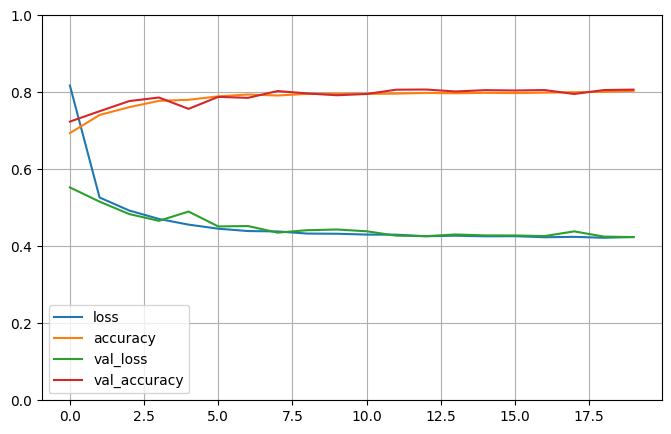

In [44]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Partidas 10min

In [45]:
print("Fit model on training data")
history_10min = model.fit(
    X_train_10min,
    y_train_10min,
    epochs=20,
    validation_data=(X_test_10min, y_test_10min)
)

Fit model on training data
Epoch 1/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.7380 - val_loss: 0.5481 - val_accuracy: 0.7205
Epoch 2/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5219 - accuracy: 0.7383 - val_loss: 0.6254 - val_accuracy: 0.6761
Epoch 3/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5222 - accuracy: 0.7399 - val_loss: 0.5598 - val_accuracy: 0.7132
Epoch 4/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.7403 - val_loss: 0.5172 - val_accuracy: 0.7371
Epoch 5/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5196 - accuracy: 0.7413 - val_loss: 0.5782 - val_accuracy: 0.7011
Epoch 6/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.7392 - val_loss: 0.5490 - val_accuracy: 0.7170
Epoch 7/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5180 - accuracy: 0.7408 - val_loss: 0.5172 - 

In [46]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_10min,
    y_train_10min,
    epochs=20,
    validation_data=(X_test_10min, y_test_10min)
)

Epoch 1/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.7427 - val_loss: 0.5212 - val_accuracy: 0.7300
Epoch 2/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7429 - val_loss: 0.5567 - val_accuracy: 0.7127
Epoch 3/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5138 - accuracy: 0.7434 - val_loss: 0.5297 - val_accuracy: 0.7317
Epoch 4/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5150 - accuracy: 0.7386 - val_loss: 0.5418 - val_accuracy: 0.7255
Epoch 5/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.7423 - val_loss: 0.5148 - val_accuracy: 0.7373
Epoch 6/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7428 - val_loss: 0.5138 - val_accuracy: 0.7418
Epoch 7/20
529/529 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7416 - val_loss: 0.5144 - val_accuracy: 0.7399
Epoch 

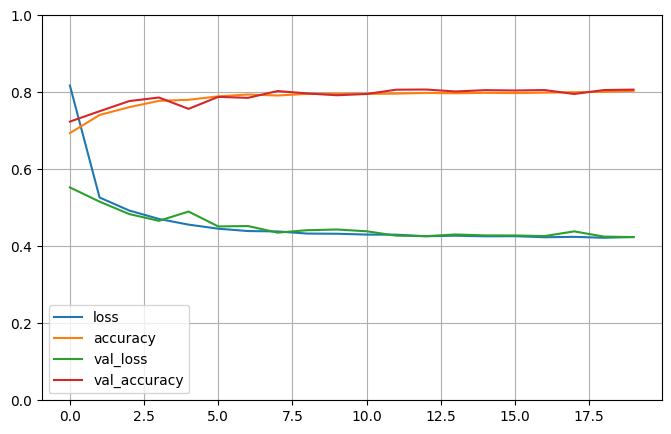

In [47]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 8.4. Desempeño contra validación

### Partidas 15min

In [48]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_15min, y_val_15min)
print("test loss, test acc:", results)

Evaluate on test data
168/168 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7868
test loss, test acc: [0.4421786665916443, 0.7868455648422241]


### Partidas 10min

In [49]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_10min, y_val_10min)
print("test loss, test acc:", results)

Evaluate on test data
166/166 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7204
test loss, test acc: [0.5558803081512451, 0.7203710675239563]


# 9. Modelo 3

# 9.1. Arquitectura de la red neuronal

In [50]:
capas = [
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='softmax')
]
model = keras.models.Sequential(capas)

# 9.2. Inicializadores

In [51]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 9.3. Entrenamiento

### Partidas 15min

In [52]:
print("Fit model on training data")
history_15min = model.fit(
    X_train_15min,
    y_train_15min,
    epochs=30,
    validation_data=(X_test_15min, y_test_15min)
)

Fit model on training data
Epoch 1/30
537/537 [==============================] - 3s 3ms/step - loss: 0.9097 - accuracy: 0.6509 - val_loss: 0.5653 - val_accuracy: 0.7147
Epoch 2/30
537/537 [==============================] - 2s 3ms/step - loss: 0.5388 - accuracy: 0.7277 - val_loss: 0.5802 - val_accuracy: 0.6949
Epoch 3/30
537/537 [==============================] - 2s 3ms/step - loss: 0.4966 - accuracy: 0.7578 - val_loss: 0.5782 - val_accuracy: 0.6933
Epoch 4/30
537/537 [==============================] - 2s 3ms/step - loss: 0.4670 - accuracy: 0.7770 - val_loss: 0.4681 - val_accuracy: 0.7764
Epoch 5/30
537/537 [==============================] - 2s 3ms/step - loss: 0.4585 - accuracy: 0.7785 - val_loss: 0.4417 - val_accuracy: 0.7979
Epoch 6/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4498 - accuracy: 0.7842 - val_loss: 0.4383 - val_accuracy: 0.7995
Epoch 7/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4422 - accuracy: 0.7918 - val_loss: 0.5274 - 

In [53]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_15min,
    y_train_15min,
    epochs=30,
    validation_data=(X_test_15min, y_test_15min)
)

Epoch 1/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4142 - accuracy: 0.8032 - val_loss: 0.4194 - val_accuracy: 0.8123
Epoch 2/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4142 - accuracy: 0.8042 - val_loss: 0.4396 - val_accuracy: 0.7955
Epoch 3/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4120 - accuracy: 0.8078 - val_loss: 0.4205 - val_accuracy: 0.8069
Epoch 4/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4135 - accuracy: 0.8056 - val_loss: 0.4289 - val_accuracy: 0.8018
Epoch 5/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4117 - accuracy: 0.8059 - val_loss: 0.4204 - val_accuracy: 0.8062
Epoch 6/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4115 - accuracy: 0.8052 - val_loss: 0.4184 - val_accuracy: 0.8123
Epoch 7/30
537/537 [==============================] - 2s 4ms/step - loss: 0.4108 - accuracy: 0.8084 - val_loss: 0.4326 - val_accuracy: 0.7920
Epoch 

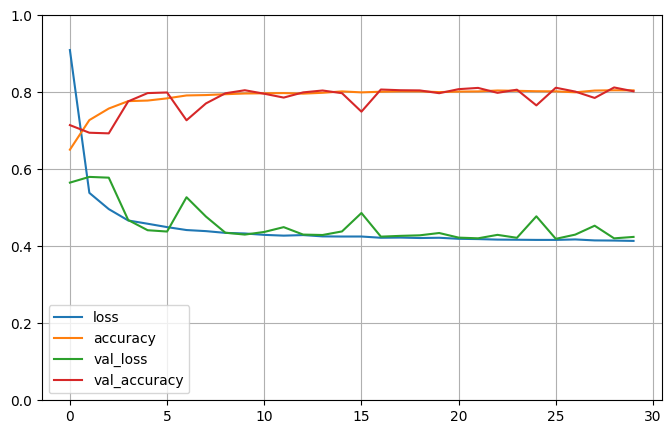

In [54]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Partidas 10min

In [55]:
print("Fit model on training data")
history_10min = model.fit(
    X_train_10min,
    y_train_10min,
    epochs=30,
    validation_data=(X_test_10min, y_test_10min)
)

Fit model on training data
Epoch 1/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5220 - accuracy: 0.7387 - val_loss: 0.5330 - val_accuracy: 0.7227
Epoch 2/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5196 - accuracy: 0.7397 - val_loss: 0.5320 - val_accuracy: 0.7324
Epoch 3/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5187 - accuracy: 0.7394 - val_loss: 0.5261 - val_accuracy: 0.7336
Epoch 4/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5172 - accuracy: 0.7390 - val_loss: 0.5171 - val_accuracy: 0.7381
Epoch 5/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5167 - accuracy: 0.7411 - val_loss: 0.5381 - val_accuracy: 0.7241
Epoch 6/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5150 - accuracy: 0.7417 - val_loss: 0.5141 - val_accuracy: 0.7395
Epoch 7/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5160 - accuracy: 0.7417 - val_loss: 0.5513 - 

In [56]:
#Se reentrena para ver si mejora. COntinua en el punto donde acabó el entrenamiento anterior
model.fit(
    X_train_10min,
    y_train_10min,
    epochs=30,
    validation_data=(X_test_10min, y_test_10min)
)

Epoch 1/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5098 - accuracy: 0.7467 - val_loss: 0.5313 - val_accuracy: 0.7310
Epoch 2/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5096 - accuracy: 0.7435 - val_loss: 0.5138 - val_accuracy: 0.7397
Epoch 3/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5098 - accuracy: 0.7463 - val_loss: 0.5174 - val_accuracy: 0.7319
Epoch 4/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5094 - accuracy: 0.7424 - val_loss: 0.5356 - val_accuracy: 0.7243
Epoch 5/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5099 - accuracy: 0.7431 - val_loss: 0.5147 - val_accuracy: 0.7388
Epoch 6/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5100 - accuracy: 0.7455 - val_loss: 0.5273 - val_accuracy: 0.7253
Epoch 7/30
529/529 [==============================] - 2s 4ms/step - loss: 0.5089 - accuracy: 0.7446 - val_loss: 0.5155 - val_accuracy: 0.7442
Epoch 

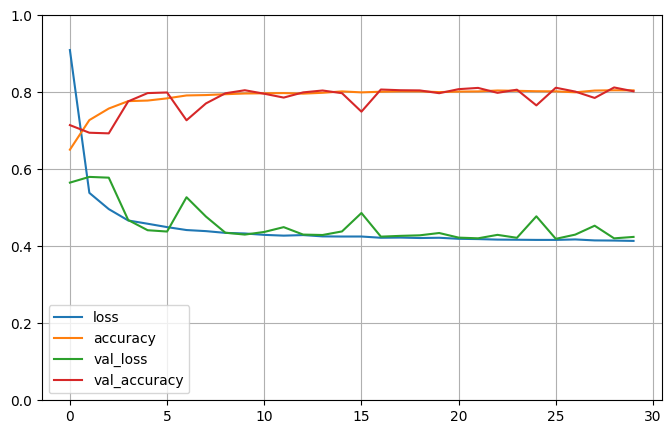

In [57]:
# Se puede ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history_15min.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 9.4. Desempeño contra validación

### Partidas 15min

In [58]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_15min, y_val_15min)
print("test loss, test acc:", results)

Evaluate on test data
168/168 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7583
test loss, test acc: [0.4844112992286682, 0.7583379745483398]


### Partidas 10min

In [59]:
# Se obtiene el "score" a partir del conjunto de validación
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_val_10min, y_val_10min)
print("test loss, test acc:", results)

Evaluate on test data
166/166 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7064
test loss, test acc: [0.5878710746765137, 0.7063612341880798]
